In [29]:
import numpy as np

import matplotlib.pyplot as plt
from perlin_numpy import (
    generate_perlin_noise_2d, generate_fractal_noise_2d
)


In [30]:

def magnitude(X,n,a):
    
    if a >=0:
        
        #I used to know how this worked, but I used a graph to figure it out
        reg =  {(1,0):abs(a),(1,1):abs(a-45),(0,1):abs(a-90),
                (-1,1):abs(a-135),(-1,0):abs(180-a),(-1,-1):abs(180-abs(a-45)),
                (0,-1):abs(180-abs(a-90)),(1,-1):abs(180-abs(a-135))}
    
        d = n**(-(reg[X]/90)+1)
    
    if a<=0:
        
        a=-a
        
        #even more confused about this one

        reg = { (1,0):abs(a),(1,1):abs(180-abs(a-135)),(0,1):abs(180-abs(a-90)),
                    (-1,1):abs(180-abs(a-45)),(-1,0):abs(180-a),
                    (-1,-1):abs(a-135),(0,-1):abs(a-90),(1,-1):abs(a-45)  }
        
        d = n**(-(reg[X]/90)+1)
    return d

In [31]:
def calculate_vectors(tup,forest, wind_direction, fire_map):
    region = [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]
    x = tup[0]
    y = tup[1]
  #divide fire fuel by 8 to evenly divide fuel among vectors
    n = forest[x,y]/8
        
        #find x and y values for diagonal vectors
    a = np.sqrt(2)*n/2
        
        #index 0 corresponds to first vector, look at drawings
    vectors = [[n,0],[a,a],[0,n],[-a,a],[-n,0],[-a,-a],[0,-n],[a,-a]]
        
        #for loop uses p,q and i as double-data storage
    for p,q in region:

            #all factors used:
        mag = 1.5
            
        c =  n*forest[x+p,y+q]*magnitude((p,q),mag,wind_direction[x,y])

        i = region.index((p,q))
         
            #x value times change coefficient
        vectors[i][0] *= c
            
            #y value times change coefficient
        vectors[i][1] *= c

    return vectors

In [32]:
def Round(x):
    if x>0:
        return (int)(x+0.5)
    else:
        return (int)(x-0.5)

[[1.224744871391589, 0.0], [1.0606601717798214, 1.0606601717798214], [0.0, 1.224744871391589], [-0.7071067811865476, 0.7071067811865476], [-0.816496580927726, 0.0], [-0.4714045207910317, -0.4714045207910317], [0.0, -0.816496580927726], [0.7071067811865476, -0.7071067811865476]]


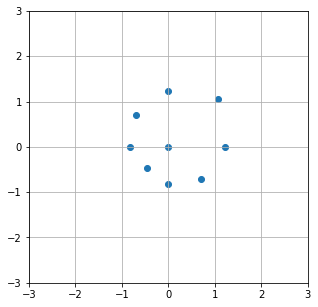

In [36]:

forest = np.zeros((16,16),dtype = float)
fire_map = np.zeros((16,16),dtype = float)
wind_direction = np.zeros((16,16),dtype=float)
fire_map[8,8] = 1


#initialize list of where fire starts from to iterate from
lst = []
for x in range(0,16):
    for y in range(0,16):
        
        #wind direction
        wind_direction[x,y] += 45
        
        if fire_map[x,y]>0:
            lst.append((x,y))
            
#initialize forest weights     
for x in forest:
    x+=4
    





    
vectors = calculate_vectors(lst[0],forest, wind_direction, fire_map)


def fire_spread(lst,forest, wind_direction,fire_map):
    
    for x,y in lst:
        vectors = calculate_vectors((x,y),forest,wind_direction,fire_map)
        
       # for i in vectors:
         #   vectors[vectors.index(i)] = [Round(i[0]),Round(i[1])]
        print(vectors)
            
fire_spread(lst,forest, wind_direction,fire_map)  
    

##plot result

#x1 and y1 + ceneter
x1 = [0]
y1 = [0]
        
for x,y in vectors:
    
    x1.append(x)
    y1.append(y)

    
plt.figure(figsize=(5,5)) 
plt.scatter(x1, y1)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()
plt.show()

      
   
               
        
        #each of the first terms corresponds to a vector from the center
        # each of the second terms corresponds to adjusted value
       
        
           
     

                
            
        
    


In [6]:

##Testing version:

region = [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]
    for x,y in lst:
        n = forest[x,y]/8
        a = math.sqrt(2)*n/2
        print("A",a)
        print("N",n,"\n")
        
        
        vectors = [[n,0],[a,a],[0,n],[-a,a],[-n,0],[-a,-a],[0,-n],[a,-a]]
        
        print("First vectors",vectors,"\n")
    
        for p,q in region:

            c =  n*forest[x+p,y+q]*magnitude((p,q),mag,wind_direction[x,y])
            
            i = region.index((p,q))
            print("C",c,"\n")
            #x value times change coefficient
            vectors[i][0] *= c
            #y value times change coefficient
            vectors[i][1] *= c
            print(vectors[i])
        
        print("After vectors",vectors,"\n")
        return vectors

IndentationError: unexpected indent (1145565954.py, line 4)

In [88]:
lst = [[0,4],[3,2],(5,7)]
lst[1][0]*=5
lst[1][1]*=5
print(lst)
lst.index([15,10])

[[0, 4], [15, 10], (5, 7)]


1